In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
from subprocess import check_output
print (check_output(["ls","./"]).decode("utf-8"))

Deeplearning.ipynb
keras
README.md
Sign-Language-Digits-Dataset
Signlanguage.ipynb



(-0.5, 63.5, 63.5, -0.5)

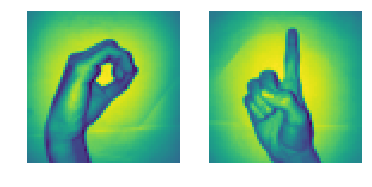

In [3]:
x_l= np.load('./Sign-Language-Digits-Dataset/X.npy')
y_l= np.load('./Sign-Language-Digits-Dataset/Y.npy')
img_size= 64
plt.subplot(1,2,1)
plt.imshow(x_l[260].reshape(img_size,img_size))
plt.axis('off')
plt.subplot(1,2,2)
plt.imshow(x_l[900].reshape(img_size,img_size))
plt.axis('off')

In [4]:
X = np.concatenate((x_l[204:409], x_l[822:1027]),axis=0)
z= np.zeros(205)
o= np.ones(205)
Y = np.concatenate((z,o),axis=0).reshape(X.shape[0],1)

print(X.shape,Y.shape)

#The shape of the X is (410, 64, 64)
#410 means that we have 410 images (zero and one signs)
#64 means that our image size is 64x64 (64x64 pixels)
#The shape of the Y is (410,1)
#410 means that we have 410 labels (0 and 1)

(410, 64, 64) (410, 1)


In [5]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=0.15,random_state= 42)
number_of_train= X_train.shape[0]
number_of_test = X_test.shape[0]
print (X_train.shape[1],X_test.shape[1],number_of_train,number_of_test)

64 64 348 62


In [6]:

X_train_flatten = X_train.reshape(number_of_train,X_train.shape[1]*X_train.shape[1])
X_test_flatten = X_test.reshape(number_of_test,X_test.shape[1]*X_test.shape[1])

print( X_train.shape,X_test.shape)
print(X_train_flatten.shape,X_test_flatten.shape)
#we have 3D input array so we have to make it 2D, therefore we flatten/reshape our 3D array into 2D imput array

(348, 64, 64) (62, 64, 64)
(348, 4096) (62, 4096)


In [7]:
x_train = X_train_flatten.T
x_test= X_test_flatten.T
y_train= Y_train.T
y_test = Y_test.T

print (x_train.shape,X_test.shape,y_train.shape,y_test.shape)

(4096, 348) (62, 64, 64) (1, 348) (1, 62)


Cost after iteration 0: 14.014222
Cost after iteration 10: 2.544689
Cost after iteration 20: 2.577950
Cost after iteration 30: 2.397999
Cost after iteration 40: 2.185019
Cost after iteration 50: 1.968348
Cost after iteration 60: 1.754195
Cost after iteration 70: 1.535079
Cost after iteration 80: 1.297567
Cost after iteration 90: 1.031919
Cost after iteration 100: 0.737019
Cost after iteration 110: 0.441355
Cost after iteration 120: 0.252278
Cost after iteration 130: 0.205168
Cost after iteration 140: 0.196168


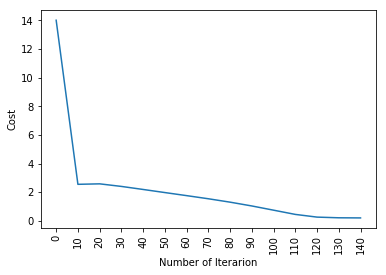

train accuracy: 92.816091954023 %
test accuracy: 93.54838709677419 %


In [8]:
def initialize_weights_and_bias(dimension):
    w = np.full((dimension,1),0.01)
    b = 0.0
    return w, b
def sigmoid(z):
    y_head = 1/(1+np.exp(-z))
    return y_head

# Forward propagation steps:
# find z = w.T*x+b
# y_head = sigmoid(z)
# loss(error) = loss(y,y_head)
# cost = sum(loss)
def forward_propagation(w,b,x_train,y_train):
    z = np.dot(w.T,x_train) + b
    y_head = sigmoid(z)
    loss = -y_train*np.log(y_head)-(1-y_train)*np.log(1-y_head)
    cost = (np.sum(loss))/x_train.shape[1]      # x_train.shape[1]  is for scaling
    return cost 

#Reducing Cost FOR wrong prediction
def forward_backward_propagation(w,b,x_train,y_train):
    # forward propagation
    z = np.dot(w.T,x_train) + b
    y_head = sigmoid(z)
    loss = -y_train*np.log(y_head)-(1-y_train)*np.log(1-y_head)
    cost = (np.sum(loss))/x_train.shape[1]      # x_train.shape[1]  is for scaling
    # backward propagation
    derivative_weight = (np.dot(x_train,((y_head-y_train).T)))/x_train.shape[1] # x_train.shape[1]  is for scaling
    derivative_bias = np.sum(y_head-y_train)/x_train.shape[1]                 # x_train.shape[1]  is for scaling
    gradients = {"derivative_weight": derivative_weight,"derivative_bias": derivative_bias}
    return cost,gradients

def update(w, b, x_train, y_train, learning_rate,number_of_iterarion):
    cost_list = []
    cost_list2 = []
    index = []
    # updating(learning) parameters is number_of_iterarion times
    for i in range(number_of_iterarion):
        # make forward and backward propagation and find cost and gradients
        cost,gradients = forward_backward_propagation(w,b,x_train,y_train)
        cost_list.append(cost)
        # lets update
        w = w - learning_rate * gradients["derivative_weight"]
        b = b - learning_rate * gradients["derivative_bias"]
        if i % 10 == 0:
            cost_list2.append(cost)
            index.append(i)
            print ("Cost after iteration %i: %f" %(i, cost))
    # we update(learn) parameters weights and bias
    parameters = {"weight": w,"bias": b}
    plt.plot(index,cost_list2)
    plt.xticks(index,rotation='vertical')
    plt.xlabel("Number of Iterarion")
    plt.ylabel("Cost")
    plt.show()
    return parameters, gradients, cost_list

def predict(w,b,x_test):
    # x_test is a input for forward propagation
    z = sigmoid(np.dot(w.T,x_test)+b)
    Y_prediction = np.zeros((1,x_test.shape[1]))
    # if z is bigger than 0.5, our prediction is sign one (y_head=1),
    # if z is smaller than 0.5, our prediction is sign zero (y_head=0),
    for i in range(z.shape[1]):
        if z[0,i]<= 0.5:
            Y_prediction[0,i] = 0
        else:
            Y_prediction[0,i] = 1

    return Y_prediction

def logistic_regression(x_train, y_train, x_test, y_test, learning_rate ,  num_iterations):
    # initialize
    dimension =  x_train.shape[0]  # that is 4096
    w,b = initialize_weights_and_bias(dimension)
    # do not change learning rate
    parameters, gradients, cost_list = update(w, b, x_train, y_train, learning_rate,num_iterations)
    
    y_prediction_test = predict(parameters["weight"],parameters["bias"],x_test)
    y_prediction_train = predict(parameters["weight"],parameters["bias"],x_train)

    # Print train/test Errors
    print("train accuracy: {} %".format(100 - np.mean(np.abs(y_prediction_train - y_train)) * 100))
    print("test accuracy: {} %".format(100 - np.mean(np.abs(y_prediction_test - y_test)) * 100))
    
    
logistic_regression(x_train,y_train,x_test,y_test,learning_rate =0.01,num_iterations=150)
    

In [9]:
from sklearn import linear_model
logreg = linear_model.LogisticRegression(random_state = 42,max_iter= 150)
print("test accuracy: {} ".format(logreg.fit(x_train.T, y_train.T).score(x_test.T, y_test.T)))
print("train accuracy: {} ".format(logreg.fit(x_train.T, y_train.T).score(x_train.T, y_train.T)))

test accuracy: 0.967741935483871 
train accuracy: 1.0 


Cost after iteration 0: 0.320256
Cost after iteration 100: 0.318043
Cost after iteration 200: 0.299675
Cost after iteration 300: 0.262085
Cost after iteration 400: 0.221077
Cost after iteration 500: 0.325541
Cost after iteration 600: 0.160113
Cost after iteration 700: 0.139114
Cost after iteration 800: 0.123069
Cost after iteration 900: 0.110322
Cost after iteration 1000: 0.099869
Cost after iteration 1100: 0.091054
Cost after iteration 1200: 0.083400
Cost after iteration 1300: 0.076548
Cost after iteration 1400: 0.070302
Cost after iteration 1500: 0.064603
Cost after iteration 1600: 0.059430
Cost after iteration 1700: 0.054748
Cost after iteration 1800: 0.050595
Cost after iteration 1900: 0.047136
Cost after iteration 2000: 0.044324
Cost after iteration 2100: 0.041986
Cost after iteration 2200: 0.040010
Cost after iteration 2300: 0.038266
Cost after iteration 2400: 0.036593


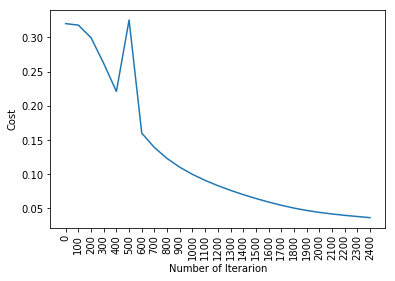

train accuracy: 99.71264367816092 %
test accuracy: 95.16129032258064 %


In [10]:
# Creating 2-layer Neural Network

def initialize_parameters_and_layer_size(x_train,y_train):
    parameters = {"weight1": np.random.randn(3,x_train.shape[0]) * 0.1,
                  "bias1": np.zeros((3,1)),
                  "weight2": np.random.randn(y_train.shape[0],3) * 0.1,
                  "bias2": np.zeros((y_train.shape[0],1))
                 }
    return parameters

def forward_propagation_NN(x_train,parameters):
    Z1 = np.dot(parameters["weight1"],x_train) +parameters["bias1"]
    A1 = np.tanh(Z1)
    Z2 = np.dot(parameters["weight2"],A1) + parameters["bias2"]
    A2 = sigmoid(Z2)

    cache = {"Z1": Z1,
             "A1": A1,
             "Z2": Z2,
             "A2": A2}
    return A2,cache

#loss and Cost Function are same in Neural Network
def compute_cost_NN(A2, Y, parameters):
    logprobs = np.multiply(np.log(A2),Y)
    cost = -np.sum(logprobs)/Y.shape[1]
    return cost


#Backward propagation
def backward_propagation_NN(parameters, cache, X,Y):
    dZ2 = cache["A2"]-Y
    dW2 = np.dot(dZ2,cache["A1"].T)/X.shape[1]
    db2 = np.sum(dZ2,axis =1,keepdims=True)/X.shape[1]
    dZ1 = np.dot(parameters["weight2"].T,dZ2)*(1 - np.power(cache["A1"], 2))
    dW1 = np.dot(dZ1,X.T)/X.shape[1]
    db1 = np.sum(dZ1,axis =1,keepdims=True)/X.shape[1]
    grads = {"dweight1": dW1,
             "dbias1": db1,
             "dweight2": dW2,
             "dbias2": db2}
    return grads

#Updating parameters
def updating_parameters_NN(parameters,grads, learning_rate=0.01):
    parameters = {"weight1": parameters["weight1"]-learning_rate*grads["dweight1"],
                  "bias1": parameters["bias1"]-learning_rate*grads["dbias1"],
                  "weight2": parameters["weight2"]-learning_rate*grads["dweight2"],
                  "bias2": parameters["bias2"]-learning_rate*grads["dbias2"]}
    
    return parameters

def predict_NN(parameters,x_test):
    A2,cache = forward_propagation_NN(x_test,parameters)
    Y_prediction = np.zeros((1,x_test.shape[1]))
    for i in range(A2.shape[1]):
        if A2[0,i]<= 0.5:
            Y_prediction[0,i] = 0
        else: 
            Y_prediction[0,i] = 1
    return Y_prediction

def two_layer_neural_network(x_train, y_train,x_test,y_test, num_iterations):
    cost_list = []
    index_list = []
    #initialize parameters and layer sizes
    parameters = initialize_parameters_and_layer_size(x_train, y_train)

    for i in range(0, num_iterations):
         # forward propagation
        A2, cache = forward_propagation_NN(x_train,parameters)
        # compute cost
        cost = compute_cost_NN(A2, y_train, parameters)
         # backward propagation
        grads = backward_propagation_NN(parameters, cache, x_train, y_train)
         # update parameters
        parameters = updating_parameters_NN(parameters, grads)
        
        if i % 100 == 0:
            cost_list.append(cost)
            index_list.append(i)
            print ("Cost after iteration %i: %f" %(i, cost))
    plt.plot(index_list,cost_list)
    plt.xticks(index_list,rotation='vertical')
    plt.xlabel("Number of Iterarion")
    plt.ylabel("Cost")
    plt.show()
    
    # predict
    y_prediction_test = predict_NN(parameters,x_test)
    y_prediction_train = predict_NN(parameters,x_train)

    # Print train/test Errors
    print("train accuracy: {} %".format(100 - np.mean(np.abs(y_prediction_train - y_train)) * 100))
    print("test accuracy: {} %".format(100 - np.mean(np.abs(y_prediction_test - y_test)) * 100))
    return parameters
parameters = two_layer_neural_network(x_train, y_train,x_test,y_test, num_iterations=2500)


In [11]:
x_train, x_test, y_train, y_test=x_train.T, x_test.T, y_train.T, y_test.T

In [12]:
#Implementing Keras Library 
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import cross_val_score
from keras.models import Sequential # initialize neural network library
from keras.layers import Dense # build our layers library
def build_classifier():
    classifier = Sequential() # initialize neural network
    classifier.add(Dense(units = 8, kernel_initializer = 'uniform', activation = 'relu',
                         input_dim = x_train.shape[1]))
    classifier.add(Dense(units = 4, kernel_initializer = 'uniform', activation = 'relu'))
    classifier.add(Dense(units = 1, kernel_initializer = 'uniform', activation = 'sigmoid'))
    classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])
    return classifier
classifier = KerasClassifier(build_fn = build_classifier, epochs = 100)
accuracies = cross_val_score(estimator = classifier, X = x_train, y = y_train, cv = 3)
mean = accuracies.mean()
variance = accuracies.std()
print("Accuracy mean: "+ str(mean))
print("Accuracy variance: "+ str(variance))

    

Using TensorFlow backend.


Epoch 1/100
232/232 [==============================] - 1s 2ms/step - loss: 0.6923 - acc: 0.5302
Epoch 2/100
232/232 [==============================] - 0s 119us/step - loss: 0.6907 - acc: 0.5431
Epoch 3/100
232/232 [==============================] - 0s 155us/step - loss: 0.6889 - acc: 0.5431
Epoch 4/100
232/232 [==============================] - 0s 143us/step - loss: 0.6877 - acc: 0.5431
Epoch 5/100
232/232 [==============================] - 0s 140us/step - loss: 0.6865 - acc: 0.5431
Epoch 6/100
232/232 [==============================] - 0s 174us/step - loss: 0.6855 - acc: 0.5431
Epoch 7/100
232/232 [==============================] - 0s 129us/step - loss: 0.6834 - acc: 0.5431
Epoch 8/100
232/232 [==============================] - 0s 129us/step - loss: 0.6816 - acc: 0.5431
Epoch 9/100
232/232 [==============================] - 0s 129us/step - loss: 0.6792 - acc: 0.5431
Epoch 10/100
232/232 [==============================] - 0s 155us/step - loss: 0.6757 - acc: 0.5431
Epoch 11/100
232/232 

232/232 [==============================] - 0s 208us/step - loss: 0.1135 - acc: 0.9569
Epoch 84/100
232/232 [==============================] - 0s 136us/step - loss: 0.0988 - acc: 0.9741
Epoch 85/100
232/232 [==============================] - 0s 180us/step - loss: 0.0903 - acc: 0.9612
Epoch 86/100
232/232 [==============================] - 0s 157us/step - loss: 0.0840 - acc: 0.9741
Epoch 87/100
232/232 [==============================] - 0s 167us/step - loss: 0.0798 - acc: 0.9698
Epoch 88/100
232/232 [==============================] - 0s 159us/step - loss: 0.0814 - acc: 0.9741
Epoch 89/100
232/232 [==============================] - 0s 165us/step - loss: 0.0878 - acc: 0.9612
Epoch 90/100
232/232 [==============================] - 0s 138us/step - loss: 0.1211 - acc: 0.9612
Epoch 91/100
232/232 [==============================] - 0s 132us/step - loss: 0.0944 - acc: 0.9612
Epoch 92/100
232/232 [==============================] - 0s 141us/step - loss: 0.0952 - acc: 0.9698
Epoch 93/100
232/232 [=

232/232 [==============================] - 0s 125us/step - loss: 0.2628 - acc: 0.9914
Epoch 66/100
232/232 [==============================] - 0s 133us/step - loss: 0.2705 - acc: 0.9526
Epoch 67/100
232/232 [==============================] - 0s 181us/step - loss: 0.2702 - acc: 0.9871
Epoch 68/100
232/232 [==============================] - 0s 167us/step - loss: 0.2722 - acc: 0.9612
Epoch 69/100
232/232 [==============================] - 0s 185us/step - loss: 0.2759 - acc: 0.9828
Epoch 70/100
232/232 [==============================] - 0s 149us/step - loss: 0.2845 - acc: 0.9483
Epoch 71/100
232/232 [==============================] - 0s 191us/step - loss: 0.2643 - acc: 0.9784
Epoch 72/100
232/232 [==============================] - 0s 162us/step - loss: 0.2608 - acc: 0.9871
Epoch 73/100
232/232 [==============================] - 0s 146us/step - loss: 0.2527 - acc: 0.9784
Epoch 74/100
232/232 [==============================] - 0s 130us/step - loss: 0.2674 - acc: 0.9784
Epoch 75/100
232/232 [=

232/232 [==============================] - 0s 103us/step - loss: 0.1088 - acc: 0.9612
Epoch 48/100
232/232 [==============================] - 0s 122us/step - loss: 0.0971 - acc: 0.9655
Epoch 49/100
232/232 [==============================] - 0s 102us/step - loss: 0.1000 - acc: 0.9612
Epoch 50/100
232/232 [==============================] - 0s 164us/step - loss: 0.1106 - acc: 0.9655
Epoch 51/100
232/232 [==============================] - 0s 148us/step - loss: 0.0914 - acc: 0.9741
Epoch 52/100
232/232 [==============================] - 0s 168us/step - loss: 0.0876 - acc: 0.9698
Epoch 53/100
232/232 [==============================] - 0s 100us/step - loss: 0.0813 - acc: 0.9784
Epoch 54/100
232/232 [==============================] - 0s 145us/step - loss: 0.0878 - acc: 0.9741
Epoch 55/100
232/232 [==============================] - 0s 147us/step - loss: 0.0738 - acc: 0.9784
Epoch 56/100
232/232 [==============================] - 0s 192us/step - loss: 0.0736 - acc: 0.9828
Epoch 57/100
232/232 [=